# Preprocessing of DataSet CovType

+ read data
+ analysis data
+ preprocess data
    - complex encoding
    - simple encoding
+ split into training data, testing data and validation data
+ store them to hard disk

##### Hongbo Zhang

## CovType

In [1]:
import gzip
import io
import time
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# read data from covtype.data.gz

datafile = "../data/covtype.data.gz"

gzipfile = gzip.open(datafile, 'rb')

file = io.BufferedReader(gzipfile)

ndata = 581012
rawdata = np.empty((ndata,55))

start = time.time()
i = 0
for line in file:
    rawdata[i] = np.fromstring(line, dtype=int, sep=",")
    i += 1;
    if i % 100000 == 0:
        print("Has read to line: ", i)
end = time.time()

print("use time: ", end-start, " to read data file.")
            
gzipfile.close()

Has read to line:  100000
Has read to line:  200000
Has read to line:  300000
Has read to line:  400000
Has read to line:  500000
use time:  2.009333848953247  to read data file.


In [3]:
# rawdata[0:5]
print(rawdata.shape)

(581012, 55)


## Encoding

### Dataset Overview

Features
1. Elevation: Elevation in meters
2. Aspect: Aspect in degrees azimuth
3. Slope: Slope in degrees
4. Horizontal_Distance_To_Hydrology: Horz Dist to nearest surface water features                                                                               
5. Vertical_Distance_To_Hydrology: Vert Dist to nearest surface water features
6. Horizontal_Distance_To_Roadways: Horz Dist to nearest roadway
7. Hillshade_9am: Hillshade index at 9am, summer solstice
8. Hillshade_Noon: Hillshade index at noon, summer soltice
9. Hillshade_3pm: Hillshade index at 3pm, summer solstice
10. Horizontal_Distance_To_Fire_Points: Horz Dist to nearest wildfire ignition points
11. Wilderness_Area (4 binary columns): 0 (absence) or 1 (presence)  Wilderness area designation
12. Soil_Type (40 binary columns): 0 (absence) or 1 (presence)  Soil Type designation

Target
13. Cover_Type (7 types): 1 to 7 Forest Cover Type designation

### Principle of Encoding

+ as few attributes as possible
+ adding noise to avoid overfitting
+ circular value encoding
    - no preprocessing
    - sin cos
    - categoried, and give its neighbor a non-zero value. e.g., angels are categorized to E,S,W,N. if E, encoding as (1,0.5,0,0.5) to present E is near S and N. ES is encoded as (1,1,0,0)
+ category value
    - one hot representation
    - a single int
    - equilateral encoding. it can reduce the dim by 1.
+ continuous input should be normalize to [0,1]
+ un-uniform distributed category data. one binary for each high freq category, one binary for all low freq category


If the category is encoded in one-hot,
there will be so many variable associated with category.
E.g., in this example, the soil type is just one variable,
but consumes 40 input variables. In this case,
it will overwhelm, and dominated over the continuous quantitative 
variable (e.g., elevation, aspect, slope ... in this example)

solution [here](https://stats.stackexchange.com/questions/265982/neural-nets-one-hot-variable-overwhelming-continuous) and [here](https://www.tensorflow.org/tutorials/word2vec)

In [4]:
# useful functions

def linearSquash(x):
    '''linear squash x into range [0,1]'''
    xmin = min(x)
    xmax = max(x)
    x = (x - xmin)/(xmax - xmin)
    return x

### Encoding Details

max elevation is:  1.0
min elevation is:  0.0


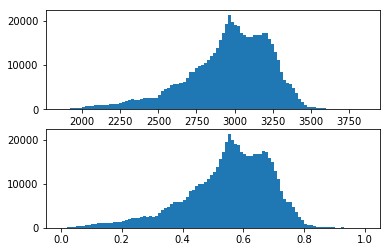

In [5]:
# 0. elevation: use simple linear squash.
#    in the future: equailize histgram
#                 : try categories

elevation = rawdata[:,0]
elevation = linearSquash(elevation)
# data = np.array([elevation])

# visualisation

print("max elevation is: ", max(elevation))
print("min elevation is: ", min(elevation))

plt.subplot(2,1,1)
plt.hist(rawdata[:,0], 100)

plt.subplot(2,1,2)
plt.hist(elevation, 100)

plt.show()

max aspect is:  360.0
min aspect is:  0.0


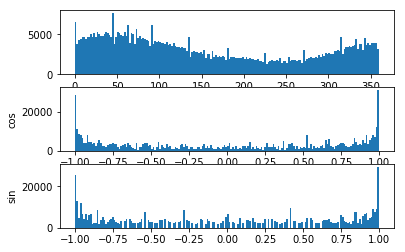

In [6]:
# 1. aspect: use (cos,sin) function. since neither cos nor sin is single valued function. therefore we will both
#       drawback: non-uniform mapping, more data will be mapped to -1 and +1 than other values
#       in the future: try categories

aspect = rawdata[:,1]
aspect1 = np.vectorize(math.cos)(aspect)
aspect2 = np.vectorize(math.sin)(aspect)
# data = np.hstack((data, aspect1, aspect2))


# visualisation
print("max aspect is: ", max(rawdata[:,1]))
print("min aspect is: ", min(rawdata[:,1]))

plt.subplot(3,1,1)
plt.hist(rawdata[:,1], 180)
plt.subplot(3,1,2)
plt.hist(aspect1, 180)
plt.ylabel("cos")
plt.subplot(3,1,3)
plt.hist(aspect2, 180)
plt.ylabel("sin")

plt.show()

max aspect is:  66.0
min aspect is:  0.0


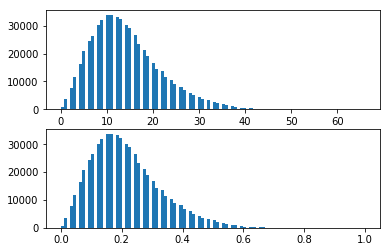

In [7]:
# 2. slope: use simple linear squach
#       drawback, all value cluster to 0 - 0.5, almost no data > 0.5

slope = linearSquash(rawdata[:,2])

# visualisation
print("max aspect is: ", max(rawdata[:,2]))
print("min aspect is: ", min(rawdata[:,2]))

plt.subplot(2,1,1)
plt.hist(rawdata[:,2], 100)
plt.subplot(2,1,2)
plt.hist(slope, 100)

plt.show()

max aspect is:  1397.0
min aspect is:  0.0


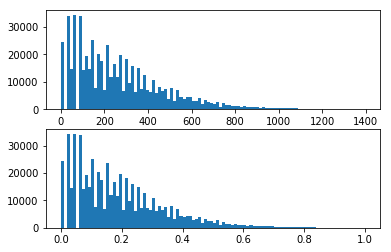

In [8]:
# 3. Horizontal_Distance_To_Hydrology: use simple linear squash
#       in the future: use category. the peak htoHdyr are several seperate categ, the rare ones together is on categ.

htoHydr = linearSquash(rawdata[:,3])

# visualisation
print("max aspect is: ", max(rawdata[:,3]))
print("min aspect is: ", min(rawdata[:,3]))

plt.subplot(2,1,1)
plt.hist(rawdata[:,3], 100)
plt.subplot(2,1,2)
plt.hist(htoHydr, 100)

plt.show()

max aspect is:  601.0
min aspect is:  -173.0


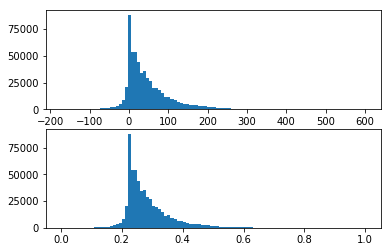

In [9]:
# 4. Vertical_Distance_To_Hydrology: why it has negative value?
#       in the future: use category. the peak htoHdyr are several seperate categ, the rare ones together is on categ.

vtoHydr = linearSquash(rawdata[:,4])

# visualisation
print("max aspect is: ", max(rawdata[:,4]))
print("min aspect is: ", min(rawdata[:,4]))

plt.subplot(2,1,1)
plt.hist(rawdata[:,4], 100)
plt.subplot(2,1,2)
plt.hist(vtoHydr, 100)

plt.show()

max aspect is:  7117.0
min aspect is:  0.0


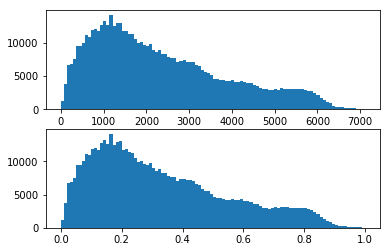

In [10]:
# 5. Horizontal_Distance_To_Roadways: simple linear squash

htoRoad = linearSquash(rawdata[:,5])

# visualisation
print("max aspect is: ", max(rawdata[:,5]))
print("min aspect is: ", min(rawdata[:,5]))

plt.subplot(2,1,1)
plt.hist(rawdata[:,5], 100)
plt.subplot(2,1,2)
plt.hist(htoRoad, 100)

plt.show()

max aspect is:  254.0
min aspect is:  0.0


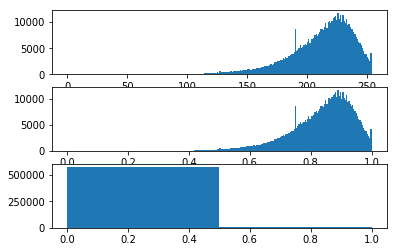

> 250:  3341


In [11]:
# 6. Hillshade_9am: unkown index encoding scheme. 
#      it seems like a possion distribution, and continous in index. using linear squash
#      it seems the continous value has been truncted at 250 (there is a spike at 250)
#      so use two variables: only is to tell whether saturated, the other is linear squash

saturate9am = np.where(rawdata[:,6] == 250, 1, 0)
hills9am = linearSquash(rawdata[:,6])

# visualisation
print("max aspect is: ", max(rawdata[:,6]))
print("min aspect is: ", min(rawdata[:,6]))

plt.subplot(3,1,1)
plt.hist(rawdata[:,6], 250)
plt.subplot(3,1,2)
plt.hist(hills9am, 250)
plt.subplot(3,1,3)
plt.hist(saturate9am, 2)

plt.show()

print("> 250: ", len(np.where(rawdata[:,6]==250)[0]))

max aspect is:  254.0
min aspect is:  0.0


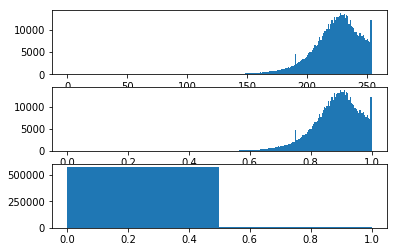

> 250:  8028


In [12]:
# 7.  Hillshade_Noon: unkown index encoding scheme. 
#      it seems like a possion distribution, and continous in index. using linear squash
#      it seems the continous value has been truncted at 250 (there is a spike at 250)
#      so use two variables: only is to tell whether saturated, the other is linear squash

saturatenoon = np.where(rawdata[:,7] == 250, 1, 0)
hillsnoon = linearSquash(rawdata[:,7])

# visualisation
print("max aspect is: ", max(rawdata[:,7]))
print("min aspect is: ", min(rawdata[:,7]))

plt.subplot(3,1,1)
plt.hist(rawdata[:,7], 250)
plt.subplot(3,1,2)
plt.hist(hillsnoon, 250)
plt.subplot(3,1,3)
plt.hist(saturatenoon, 2)

plt.show()

print("> 250: ", len(np.where(rawdata[:,7]==250)[0]))

max aspect is:  254.0
min aspect is:  0.0


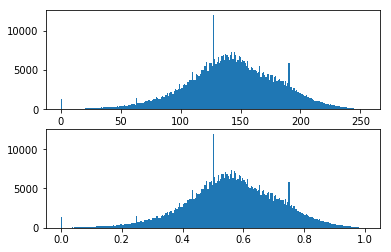

In [13]:
# 8.  Hillshade_3pm: unkown index encoding scheme. 
#      it seems like a possion distribution, and continous in index. using linear squash
#      there is no spike at 250, so only one variable

hills3pm = linearSquash(rawdata[:,8])

# visualisation
print("max aspect is: ", max(rawdata[:,8]))
print("min aspect is: ", min(rawdata[:,8]))

plt.subplot(2,1,1)
plt.hist(rawdata[:,8], 250)
plt.subplot(2,1,2)
plt.hist(hills3pm, 250)

plt.show()


max aspect is:  7173.0
min aspect is:  0.0


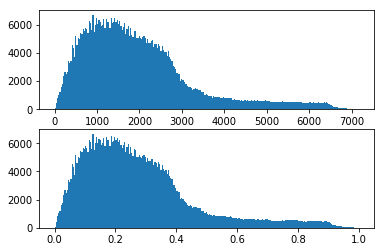

In [14]:
# 9.   Horizontal_Distance_To_Fire_Points: simple linear squash 

distofire = linearSquash(rawdata[:,9])

# visualisation
print("max aspect is: ", max(rawdata[:,9]))
print("min aspect is: ", min(rawdata[:,9]))

plt.subplot(2,1,1)
plt.hist(rawdata[:,9], 250)
plt.subplot(2,1,2)
plt.hist(distofire, 250)

plt.show()


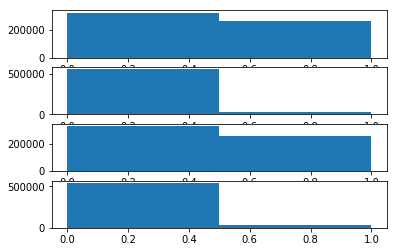

In [15]:
# 10. ~ 13. Wilderness_Area (4 binary columns): 0 (absence) or 1 (presence) Wilderness area designation
#    Wilderness Areas:       1 -- Rawah Wilderness Area
#                            2 -- Neota Wilderness Area
#                            3 -- Comanche Peak Wilderness Area
#                            4 -- Cache la Poudre Wilderness Area
#  don't preprocess them. keep them as it was. just classifier index. it will sparse
#         in the future: equilateral coding


# visualisation

plt.subplot(4,1,1)
plt.hist(rawdata[:,10], 2)
plt.subplot(4,1,2)
plt.hist(rawdata[:,11], 2)
plt.subplot(4,1,3)
plt.hist(rawdata[:,12], 2)
plt.subplot(4,1,4)
plt.hist(rawdata[:,13], 2)

plt.show()


data points with certain soil type


(array([214605.,   8607.,      0.,   1899.,  29971., 145420., 140770.,
         15573.,  22556.,   1611.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

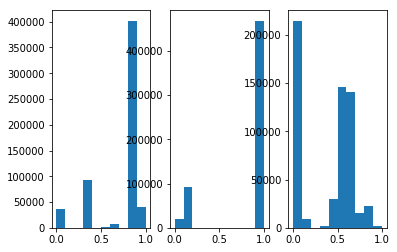

In [16]:
# 14. ~ 53. Soil_Type (40 binary columns): 0 (absence) or 1 (presence) Soil Type designation
#  Study Code USFS ELU Code                      Description
#         1         2702         Cathedral family - Rock outcrop complex, extremely stony.
#         2         2703         Vanet - Ratake families complex, very stony.
#         3         2704         Haploborolis - Rock outcrop complex, rubbly.
#         4         2705         Ratake family - Rock outcrop complex, rubbly.
#         5         2706         Vanet family - Rock outcrop complex complex, rubbly.
#         6         2717         Vanet - Wetmore families - Rock outcrop complex, stony.
#         7         3501         Gothic family.
#         8         3502         Supervisor - Limber families complex.
#         9         4201         Troutville family, very stony.
#        10         4703         Bullwark - Catamount families - Rock outcrop complex, rubbly.
#        11         4704         Bullwark - Catamount families - Rock land complex, rubbly.
#        12         4744         Legault family - Rock land complex, stony.
#        13         4758         Catamount family - Rock land - Bullwark family complex, rubbly.
#        14         5101         Pachic Argiborolis - Aquolis complex.
#        15         5151         unspecified in the USFS Soil and ELU Survey.
#        16         6101         Cryaquolis - Cryoborolis complex.
#        17         6102         Gateview family - Cryaquolis complex.
#        18         6731         Rogert family, very stony.
#        19         7101         Typic Cryaquolis - Borohemists complex.
#        20         7102         Typic Cryaquepts - Typic Cryaquolls complex.
#        21         7103         Typic Cryaquolls - Leighcan family, till substratum complex.
#        22         7201         Leighcan family, till substratum, extremely bouldery.
#        23         7202         Leighcan family, till substratum - Typic Cryaquolls complex.
#        24         7700         Leighcan family, extremely stony.
#        25         7701         Leighcan family, warm, extremely stony.
#        26         7702         Granile - Catamount families complex, very stony.
#        27         7709         Leighcan family, warm - Rock outcrop complex, extremely stony.
#        28         7710         Leighcan family - Rock outcrop complex, extremely stony.
#        29         7745         Como - Legault families complex, extremely stony.
#        30         7746         Como family - Rock land - Legault family complex, extremely stony.
#        31         7755         Leighcan - Catamount families complex, extremely stony.
#        32         7756         Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
#        33         7757         Leighcan - Catamount families - Rock outcrop complex, extremely stony.
#        34         7790         Cryorthents - Rock land complex, extremely stony.
#        35         8703         Cryumbrepts - Rock outcrop - Cryaquepts complex.
#        36         8707         Bross family - Rock land - Cryumbrepts complex, extremely stony.
#        37         8708         Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
#        38         8771         Leighcan - Moran families - Cryaquolls complex, extremely stony.
#        39         8772         Moran family - Cryorthents - Leighcan family complex, extremely stony.
#        40         8776         Moran family - Cryorthents - Rock land complex, extremely stony.
#
#        Note:   First digit:  climatic zone             Second digit:  geologic zones
#                1.  lower montane dry                   1.  alluvium
#                2.  lower montane                       2.  glacial
#                3.  montane dry                         3.  shale
#                4.  montane                             4.  sandstone
#                5.  montane dry and montane             5.  mixed sedimentary
#                6.  montane and subalpine               6.  unspecified in the USFS ELU Survey
#                7.  subalpine                           7.  igneous and metamorphic
#                8.  alpine                              8.  volcanic
#
#        The third and fourth ELU digits are unique to the mapping unit 
#        and have no special meaning to the climatic or geologic zones.

# using 3-d embedding encoding scheme

soilmap = [2702,  2703,  2704,  2705,  2706,  
           2717,  3501,  3502,  4201,  4703,  
           4704,  4744,  4758,  5101,  5151,  
           6101,  6102,  6731,  7101,  7102,  
           7103,  7201,  7202,  7700,  7701,  
           7702,  7709,  7710,  7745,  7746,  
           7755,  7756,  7757,  7790,  8703,  
           8707,  8708,  8771,  8772,  8776]

print("data points with certain soil type")
for i in range(40):
    pass
    #print("soil type ",i," has ", len(np.where(rawdata[:,14+i]==1)[0]) ," data points.")

elucode = np.zeros(ndata)
for i in range(40):
    elucode += np.where(rawdata[:, 14+i] == 1, soilmap[i], 0)
#plt.hist(elucode, 8776-2702)

climate = elucode // 1000
plt.subplot(1,3,1)
#plt.hist(climate, np.array([1,2,3,4,5,6,7,8,9])-0.5)
climate = linearSquash(elucode // 1000)
plt.hist(climate)

geo = (elucode % 1000) // 100
plt.subplot(1,3,2)
#plt.hist(geo, np.array([1,2,3,4,5,6,7,8,9])-0.5)
geo = linearSquash((elucode % 1000) // 100)
plt.hist(geo)

land = elucode % 100
plt.subplot(1,3,3)
#plt.hist(land, np.arange(90)-0.5)
land = linearSquash(elucode % 100)
plt.hist(land)

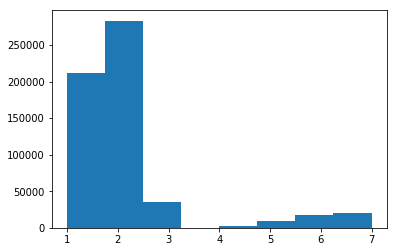

(array([  1988,   1997,   2012, ..., 306168, 306713, 307206]),)

In [17]:
# target: cover_type
# one-hot encoding is not good for tss
# in the future: using equilateral code
# However, in pytorch crossentroyloss(predict, target) target is not one hot,
# it is just category index
# so nothing changes here

plt.hist(rawdata[:,-1], 8)
plt.show()

np.nonzero(rawdata[:,-1] == 4)
# np.where(covtype == 4)

In [18]:
# using above complicated encoding scheme

data_complex = np.vstack((np.empty((0, ndata)), 
                  elevation, 
                  aspect1, aspect2, 
                  slope, 
                  htoHydr, 
                  vtoHydr, 
                  htoRoad, 
                  hills9am, saturate9am, 
                  hillsnoon, saturatenoon, 
                  hills3pm,
                  distofire, 
                  rawdata[:,10], rawdata[:,11], rawdata[:,12], rawdata[:,13], 
                  climate, geo, land, 
                  rawdata[:,-1])).T # last line is output

data_complex.shape
print(data_complex[:2])

[[ 0.36868434  0.7421542   0.67022918  0.04545455  0.18468146  0.22351421
   0.07165941  0.87007874  0.          0.91338583  0.          0.58267717
   0.87536596  1.          0.          0.          0.          0.83333333
   1.          0.5         5.        ]
 [ 0.36568284  0.85322011 -0.521551    0.03030303  0.15175376  0.21576227
   0.05479837  0.86614173  0.          0.92519685  0.          0.59448819
   0.86783772  1.          0.          0.          0.          0.83333333
   1.          0.5         5.        ]]


In [19]:
# use most simple linearsquash encoding for all variable

data_simple = np.copy(rawdata)
for i in range(rawdata.shape[1]-1):
    data_simple[:, i] = linearSquash(rawdata[:,i])

data_simple.shape
print(data_simple[:2])

[[0.36868434 0.14166667 0.04545455 0.18468146 0.22351421 0.07165941
  0.87007874 0.91338583 0.58267717 0.87536596 1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  5.        ]
 [0.36568284 0.15555556 0.03030303 0.15175376 0.21576227 0.05479837
  0.86614173 0.92519685 0.59448819 0.86783772 1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.      

## Store the Preprocessed Data to Hard Drive

In [20]:
# take 50% as training set, 50% as testing set.
# 1. the pattern distribution should be the same between training set and testing set
#    however, here we don't care about it
#    just randomly seperate whole dataset into training and testing.
# 2. we should add noise to avoid overfitting, neglect this step

trainindex = np.random.choice(ndata, int(ndata/2), replace=False)
testindex = np.delete(np.arange(ndata), trainindex)

print(trainindex.shape)
print(testindex.shape)

(290506,)
(290506,)


In [43]:
# store data_complex to hard drive

train_com = data_complex[trainindex, :]
test_com = data_complex[testindex, :]

print(train_com.shape)

start = time.time()
np.savetxt("../data/traincom.data", train_com, delimiter=',') 
np.savetxt("../data/testcom.data", test_com[:int(testindex.shape[0]/2)], delimiter=',') 
np.savetxt("../data/validcom.data", test_com[int(testindex.shape[0]/2):], delimiter=',') 
np.savetxt("../data/traincom.data.gz", train_com, delimiter=',') 
np.savetxt("../data/testcom.data.gz", test_com[:int(testindex.shape[0]/2), :], delimiter=',') 
np.savetxt("../data/validcom.data.gz", test_com[int(testindex.shape[0]/2):, :], delimiter=',') 
end = time.time()

print(end-start)

(290506, 21)
36.23656749725342


(array([106041., 141367.,  17915.,   1384.,   4821.,   8756.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

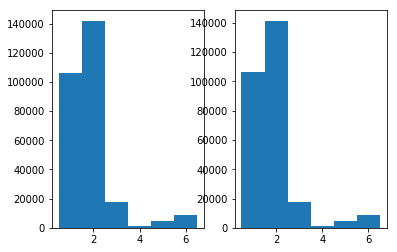

In [26]:
# to see whether train and test set contains nearly equal data from each category
plt.subplot(1,2,1)
plt.hist(train_com[:,-1], np.array([1,2,3,4,5,6,7])-0.5)
plt.subplot(1,2,2)
plt.hist(test_com[:,-1], np.array([1,2,3,4,5,6,7])-0.5)

In [36]:
# try to read
gzipfile = gzip.open("../data/traincom.data.gz", 'rb')

file = io.BufferedReader(gzipfile)

i = 0
for line in file:
    if i < 3:
        print(np.fromstring(line, sep=","))
        i += 1;
            
gzipfile.close()

[ 0.57278639  0.50257038 -0.8645363   0.24242424  0.06084467  0.21963824
  0.79443586  0.73228346  0.          0.98818898  0.          0.79133858
  0.36679214  1.          0.          0.          0.          0.83333333
  1.          0.5         1.        ]
[ 0.53876938 -0.32580981  0.94543533  0.15151515  0.1932713   0.24160207
  0.58676409  0.93307087  0.          0.90944882  0.          0.48425197
  0.61424787  1.          0.          0.          0.          0.33333333
  1.          0.48888889  2.        ]
[ 0.5837919  -0.91473018 -0.40406522  0.25757576  0.02147459  0.24160207
  0.67725165  0.69291339  0.          0.86614173  0.          0.72047244
  0.05088526  1.          0.          0.          0.          0.83333333
  1.          0.51111111  1.        ]


In [42]:
# store data_simple to hard drive

train_sim = data_simple[trainindex, :]
test_sim = data_simple[testindex, :]

print(train_sim.shape)

start = time.time()
np.savetxt("../data/trainsim.data", train_sim, delimiter=',') 
np.savetxt("../data/testsim.data", test_sim[:int(testindex.shape[0]/2)], delimiter=',') 
np.savetxt("../data/validsim.data", test_sim[int(testindex.shape[0]/2):], delimiter=',') 
np.savetxt("../data/trainsim.data.gz", train_sim, delimiter=',') 
np.savetxt("../data/testsim.data.gz", test_sim[:int(testindex.shape[0]/2)], delimiter=',') 
np.savetxt("../data/validsim.data.gz", test_sim[int(testindex.shape[0]/2):], delimiter=',') 
end = time.time()

print(end-start)

(290506, 55)
43.10927438735962


(array([106041., 141367.,  17915.,   1384.,   4821.,   8756.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

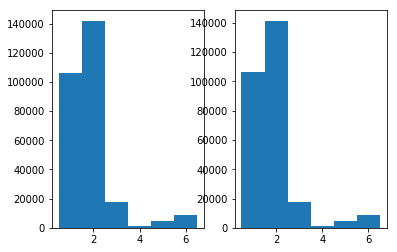

In [38]:
# to see whether train and test set contains nearly equal data from each category
plt.subplot(1,2,1)
plt.hist(train_sim[:,-1], np.array([1,2,3,4,5,6,7])-0.5)
plt.subplot(1,2,2)
plt.hist(test_sim[:,-1], np.array([1,2,3,4,5,6,7])-0.5)

In [39]:
# try to read
gzipfile = gzip.open("../data/trainsim.data.gz", 'rb')

file = io.BufferedReader(gzipfile)

i = 0
for line in file:
    if i < 3:
        print(np.fromstring(line, sep=","))
        i += 1;
            
gzipfile.close()

[0.57278639 0.67777778 0.24242424 0.06084467 0.21963824 0.79443586
 0.73228346 0.98818898 0.79133858 0.36679214 1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.        ]
[0.53876938 0.31944444 0.15151515 0.1932713  0.24160207 0.58676409
 0.93307087 0.90944882 0.48425197 0.61424787 1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

## Draft

In [17]:
## deal with target

covtype = rawdata[:,-1]

print("the first raw target are: ", covtype[0:10])

the first raw target are:  [5. 5. 2. 2. 5. 2. 5. 5. 5. 5.]


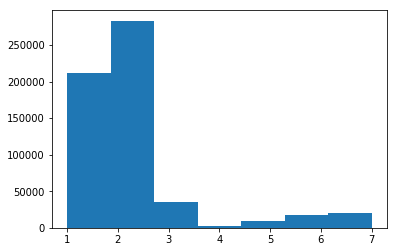

(array([  1988,   1997,   2012, ..., 306168, 306713, 307206]),)

In [31]:
plt.hist(covtype, 7)
plt.show()

np.nonzero(covtype == 4)
# np.where(covtype == 4)

In [ ]:
# covtype 4 is few, when construct testing/training/validation sets, pay attention to its freq

In [ ]:
# # not neccessary to add noise, the data is huge
# 
# f = gzip.open(out_path, 'wb')
# try:
#     f.writelines(lines)
# finally:
#     f.close()